TASK3
AIM:IRIS FLOWER CLASSIFICATION


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_path = '/content/gdrive/My Drive/IRIS.csv'
df = pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# dimensions
print(f'''No. of Rows: {df.shape[0]}
      No of columns : {df.shape[1]}''')

No. of Rows: 150
      No of columns : 5


In [ ]:
# checking for the imbalance
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Measurements')

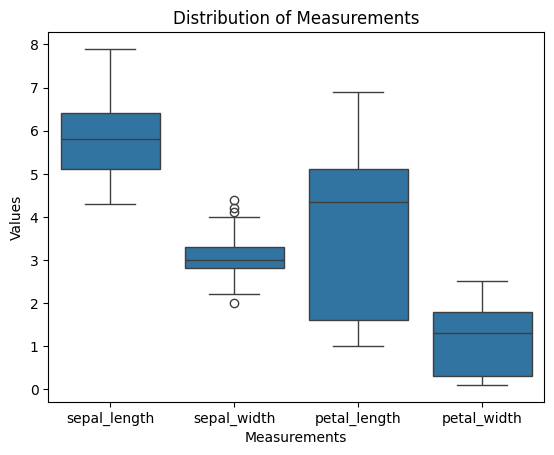

In [ ]:
# distributions of the variables
df1 = df.drop('species', axis=1).melt(value_vars=df.drop('species',axis=1).columns)
sns.boxplot(df1, x='variable', y='value')
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.title('Distribution of Measurements')



In [ ]:
# forming x and y
x= df.drop('species',axis=1)
y= df['species']


In [ ]:
# train-test split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=101, stratify=y) # Changed X to x
print(f'''X_Train:{X_train.shape}
      X_Test: {X_test.shape}
      Y_Train: {y_train.shape}
      y_Test: {y_test.shape}''')

X_Train:(120, 4)
      X_Test: (30, 4)
      Y_Train: (120,)
      y_Test: (30,)


In [ ]:
preprocess = Pipeline([
    ('scaler', StandardScaler())

])
# model

model = Pipeline([
    ('Preprocess',preprocess),
    ('classifier', LogisticRegression(multi_class='multinomial'))

])
model.fit(X_train,y_train)

Pipeline(steps=[('Preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [ ]:
#Prediction
y_pred = model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Confusion Matrix for the classification')

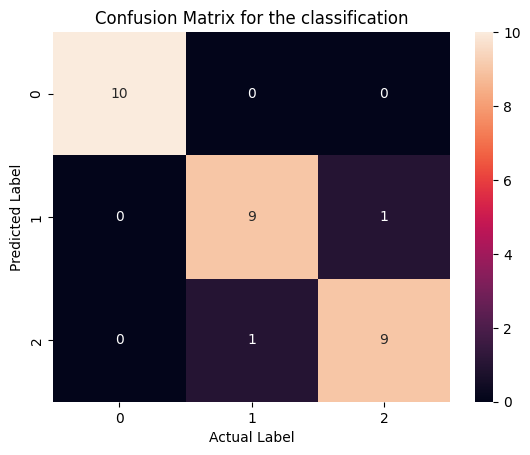

In [ ]:
# confusion matrix
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for the classification')

In [ ]:
# calssification
cr= classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
# Saving model
with open('./model.pkl', 'wb') as fp:
  pickle.dump(model,fp)